# Dataset Visualization

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from seqgen.vocabulary import *
from seqgen.datasets.sequences import *
from seqgen.preprocess import *

%load_ext autoreload
%autoreload 2

In [2]:
batch_size=4
max_length=50
img_width=800
img_height=200

vocab_in = Vocabulary(vocab_filename="seqgen/vocab_in.txt")
vocab_out = Vocabulary(vocab_filename="seqgen/vocab_out.txt")

dataset = SyntheticSequenceDataset(vocab_in, vocab_out, max_length, batch_size, continue_prob=0.95, device="cpu")

In [3]:
input_seqs, coordinates, target_seqs = dataset[0]

C:\Users\tilof\PycharmProjects\UdacityProjects\YoloImagePreparation\seqgen\datasets\sequences.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seqs = torch.tensor(features[:, :, 0]).to(torch.int64)
C:\Users\tilof\PycharmProjects\UdacityProjects\YoloImagePreparation\seqgen\datasets\sequences.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coordinates = torch.tensor(features[:, :, 1:])


In [4]:
coordinates[:, :, [0,2]] *= img_width
coordinates[:, :, [1,3]] *= img_height

In [5]:
coordinates[0, :, :].to(torch.int64)

tensor([[  0,   0,   0,   0],
        [  6,  53,  28, 125],
        [534, 137, 545, 191],
        [ 47,  52,  64, 152],
        [ 99,  86, 117, 164],
        [291,  61, 311, 165],
        [434,  50, 452, 158],
        [136,  71, 153, 158],
        [391, 149, 401, 186],
        [374,  70, 395, 162],
        [580,   3, 589,  40],
        [728,  74, 744, 148],
        [214,  69, 232, 162],
        [250,  46, 265, 118],
        [746, 143, 754, 181],
        [452, 156, 460, 198],
        [ 25,  21,  37,  62],
        [682,  55, 701, 136],
        [519,  78, 535, 174],
        [613,  67, 632, 167],
        [488,  58, 505, 157],
        [564,  13, 574,  62],
        [312,  84, 333, 176],
        [506, 137, 515, 180],
        [644,  71, 667, 178],
        [334,  89, 351, 200],
        [182,  90, 198, 181],
        [780,  81, 800, 150],
        [160, 156, 172, 194],
        [672,   7, 682,  58],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [ 

In [6]:
def create_img_array_from_coordinates(coordinates):
    img_array = torch.zeros((img_height, img_width))
    for i in range(max_length):
        x0, y0, x1, y1 = coordinates[i].to(torch.int64)
        img_array[int(y0):int(y1), int(x0):int(x0)+1] = 1.0
        img_array[int(y0):int(y1), int(x1):int(x1)+1] = 1.0
        img_array[int(y0):int(y0)+1, int(x0):int(x1)] = 1.0
        img_array[int(y1):int(y1)+1, int(x0):int(x1)] = 1.0
    return img_array

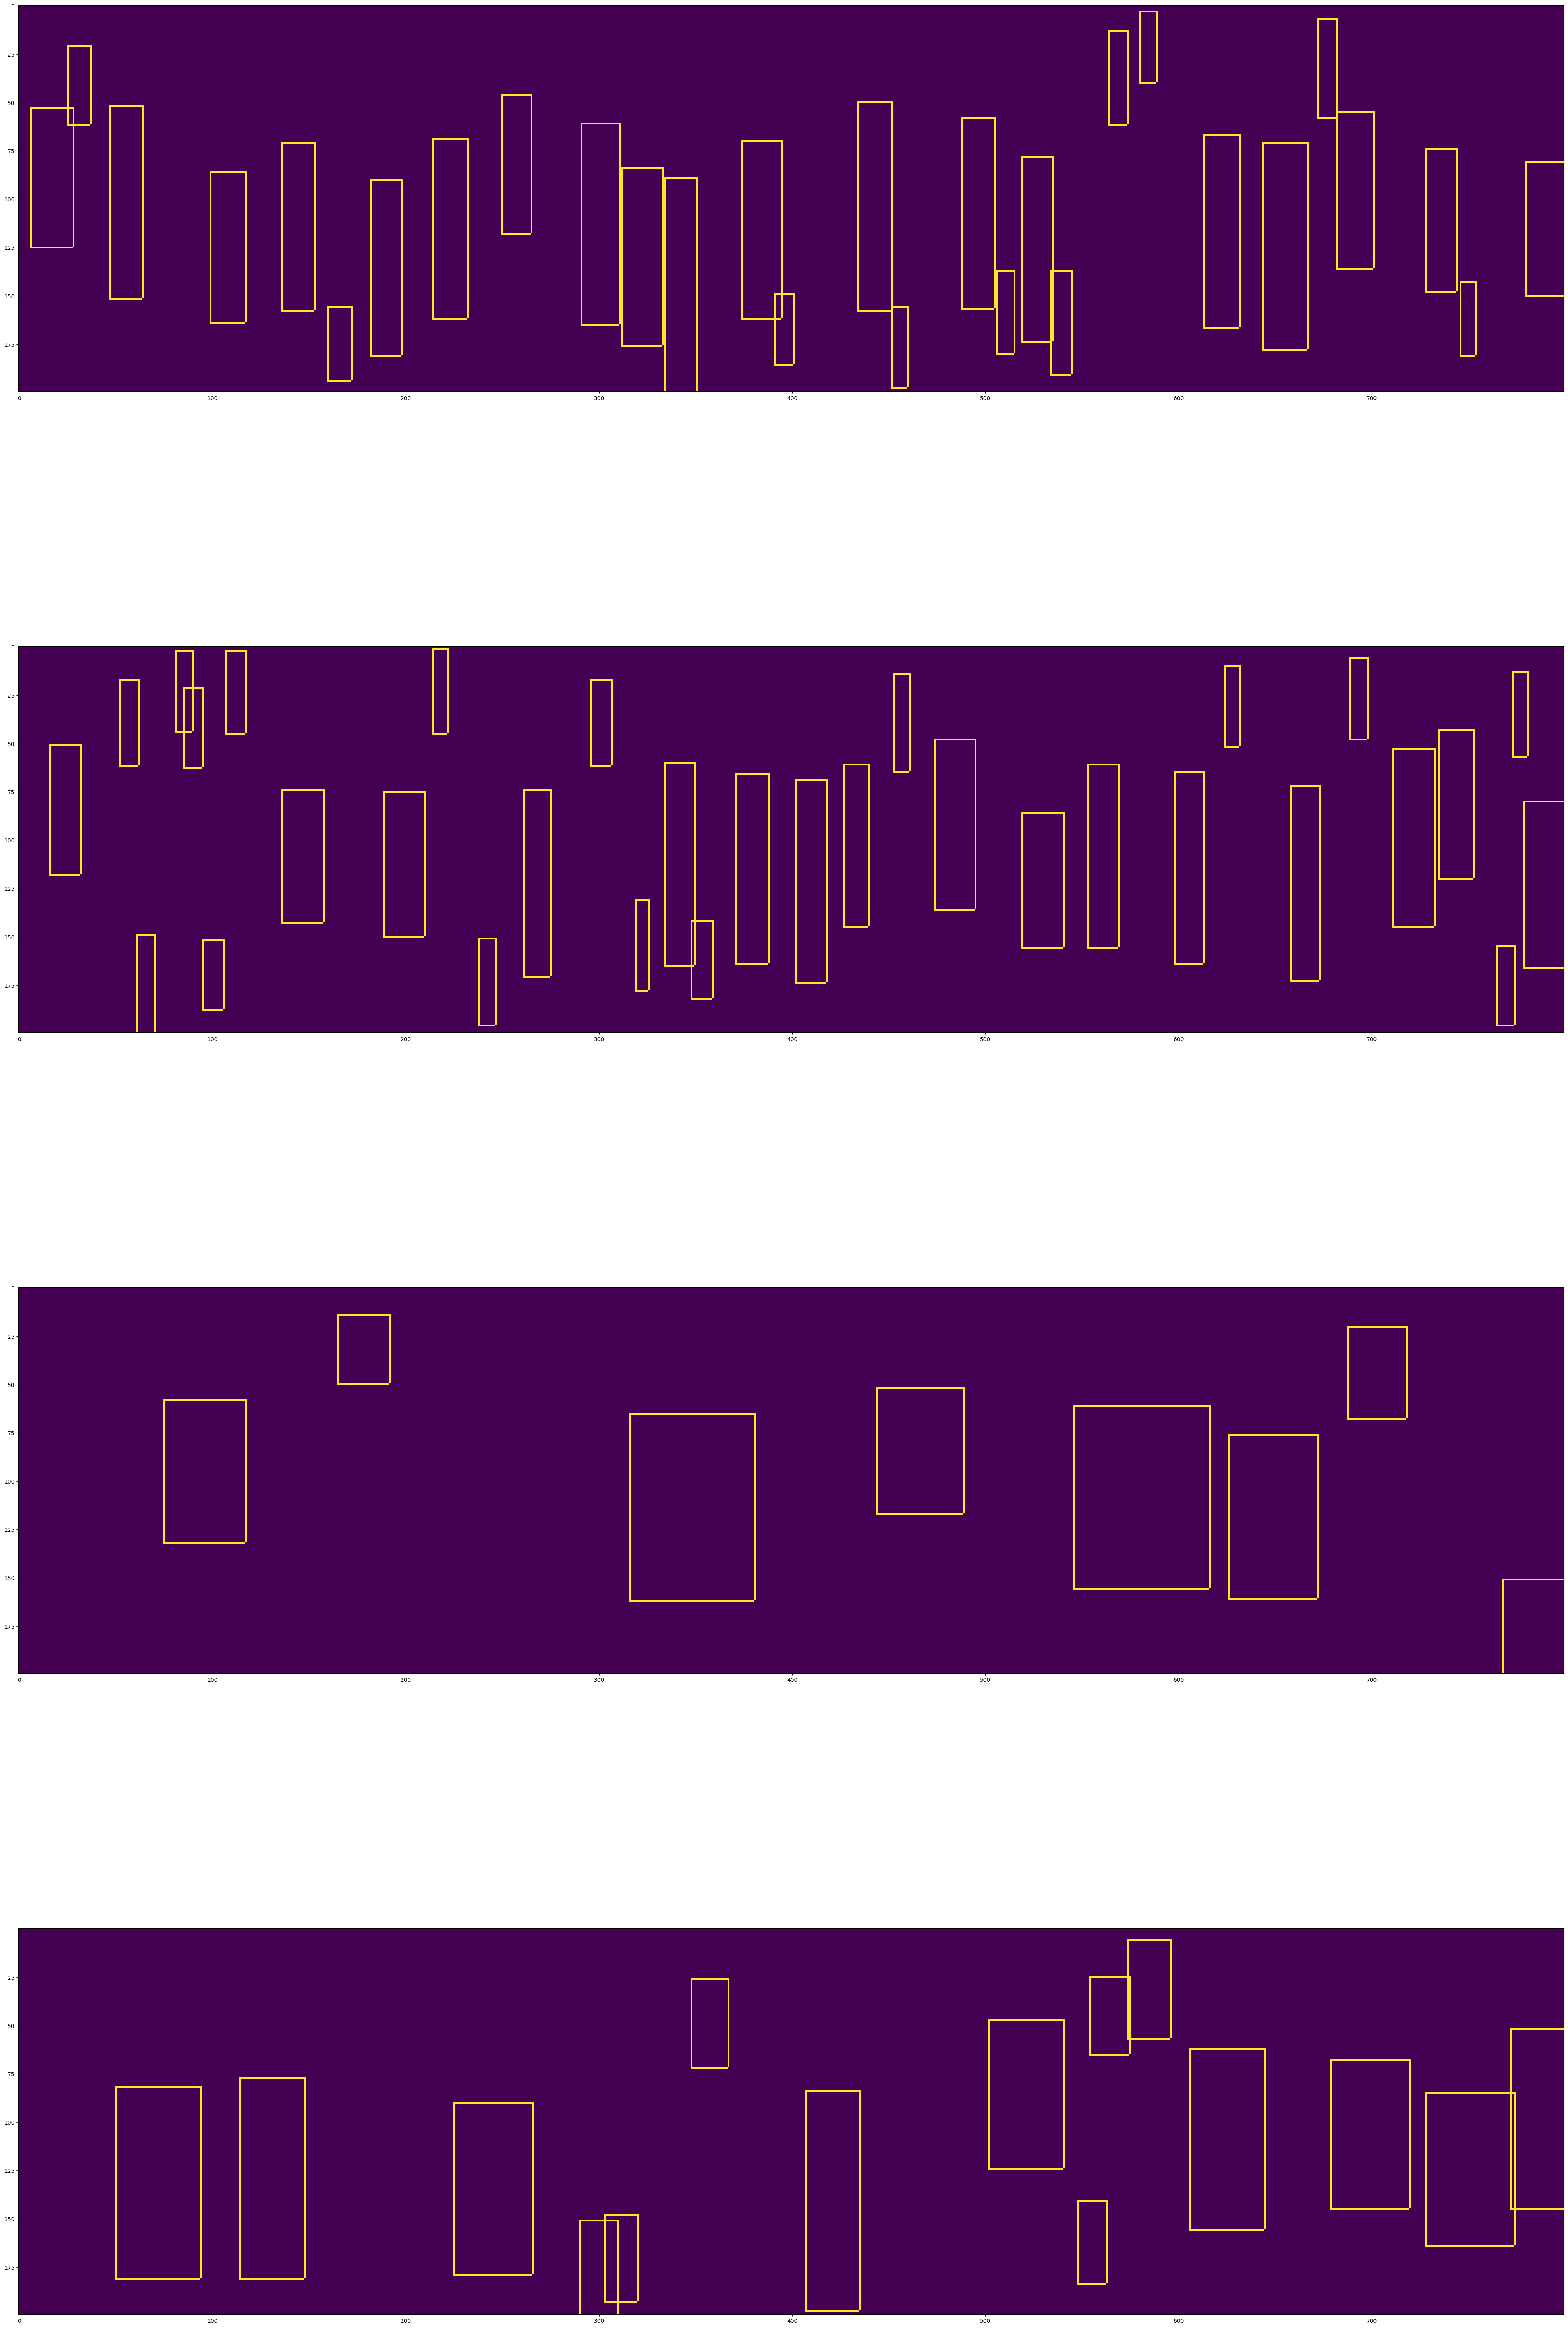

In [7]:
fig, ax = plt.subplots(batch_size, figsize=(50, 80))

for i in range(batch_size):
    ax[i].imshow(create_img_array_from_coordinates(coordinates[i]).numpy())

In [8]:
from seqgen.datasets.realdata import RealSequencesDataset
dataset = RealSequencesDataset(vocab_in=vocab_out, vocab_out=vocab_out, max_length=50, batch_size=10)

input_seqs, coordinates, target_seqs = dataset.__getitem__(0)
input_seqs[0].shape, coordinates[0].shape, target_seqs[0].shape

((50,), (50, 4), (50,))

In [9]:
coordinates[0]

array([[0.        , 0.03508772, 0.14715719, 0.87719298],
       [0.11036789, 0.78947368, 0.15719064, 1.        ],
       [0.16053512, 0.80701754, 0.19732441, 0.96491228],
       [0.2006689 , 0.75438596, 0.24080268, 1.        ],
       [0.35785953, 0.50877193, 0.44816054, 0.71929825],
       [0.51505017, 0.        , 0.62541806, 0.78947368],
       [0.6187291 , 0.73684211, 0.66220736, 0.92982456],
       [0.75585284, 0.01754386, 0.83277592, 0.77192982],
       [0.85284281, 0.75438596, 0.90301003, 0.92982456],
       [0.909699  , 0.8245614 , 0.94983278, 0.89473684],
       [0.9632107 , 0.73684211, 1.        , 0.9122807 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

In [10]:
coords = np.array(normalize_coordinates(np.array([coordinates[0][0:11]]), contains_class=False)).squeeze()
coords[0:11]

array([[0.        , 0.03508772, 0.14715719, 0.87719298],
       [0.11036789, 0.78947368, 0.15719064, 1.        ],
       [0.16053512, 0.80701754, 0.19732441, 0.96491228],
       [0.2006689 , 0.75438596, 0.24080268, 1.        ],
       [0.35785953, 0.50877193, 0.44816054, 0.71929825],
       [0.51505017, 0.        , 0.62541806, 0.78947368],
       [0.6187291 , 0.73684211, 0.66220736, 0.92982456],
       [0.75585284, 0.01754386, 0.83277592, 0.77192982],
       [0.85284281, 0.75438596, 0.90301003, 0.92982456],
       [0.909699  , 0.8245614 , 0.94983278, 0.89473684],
       [0.9632107 , 0.73684211, 1.        , 0.9122807 ]])

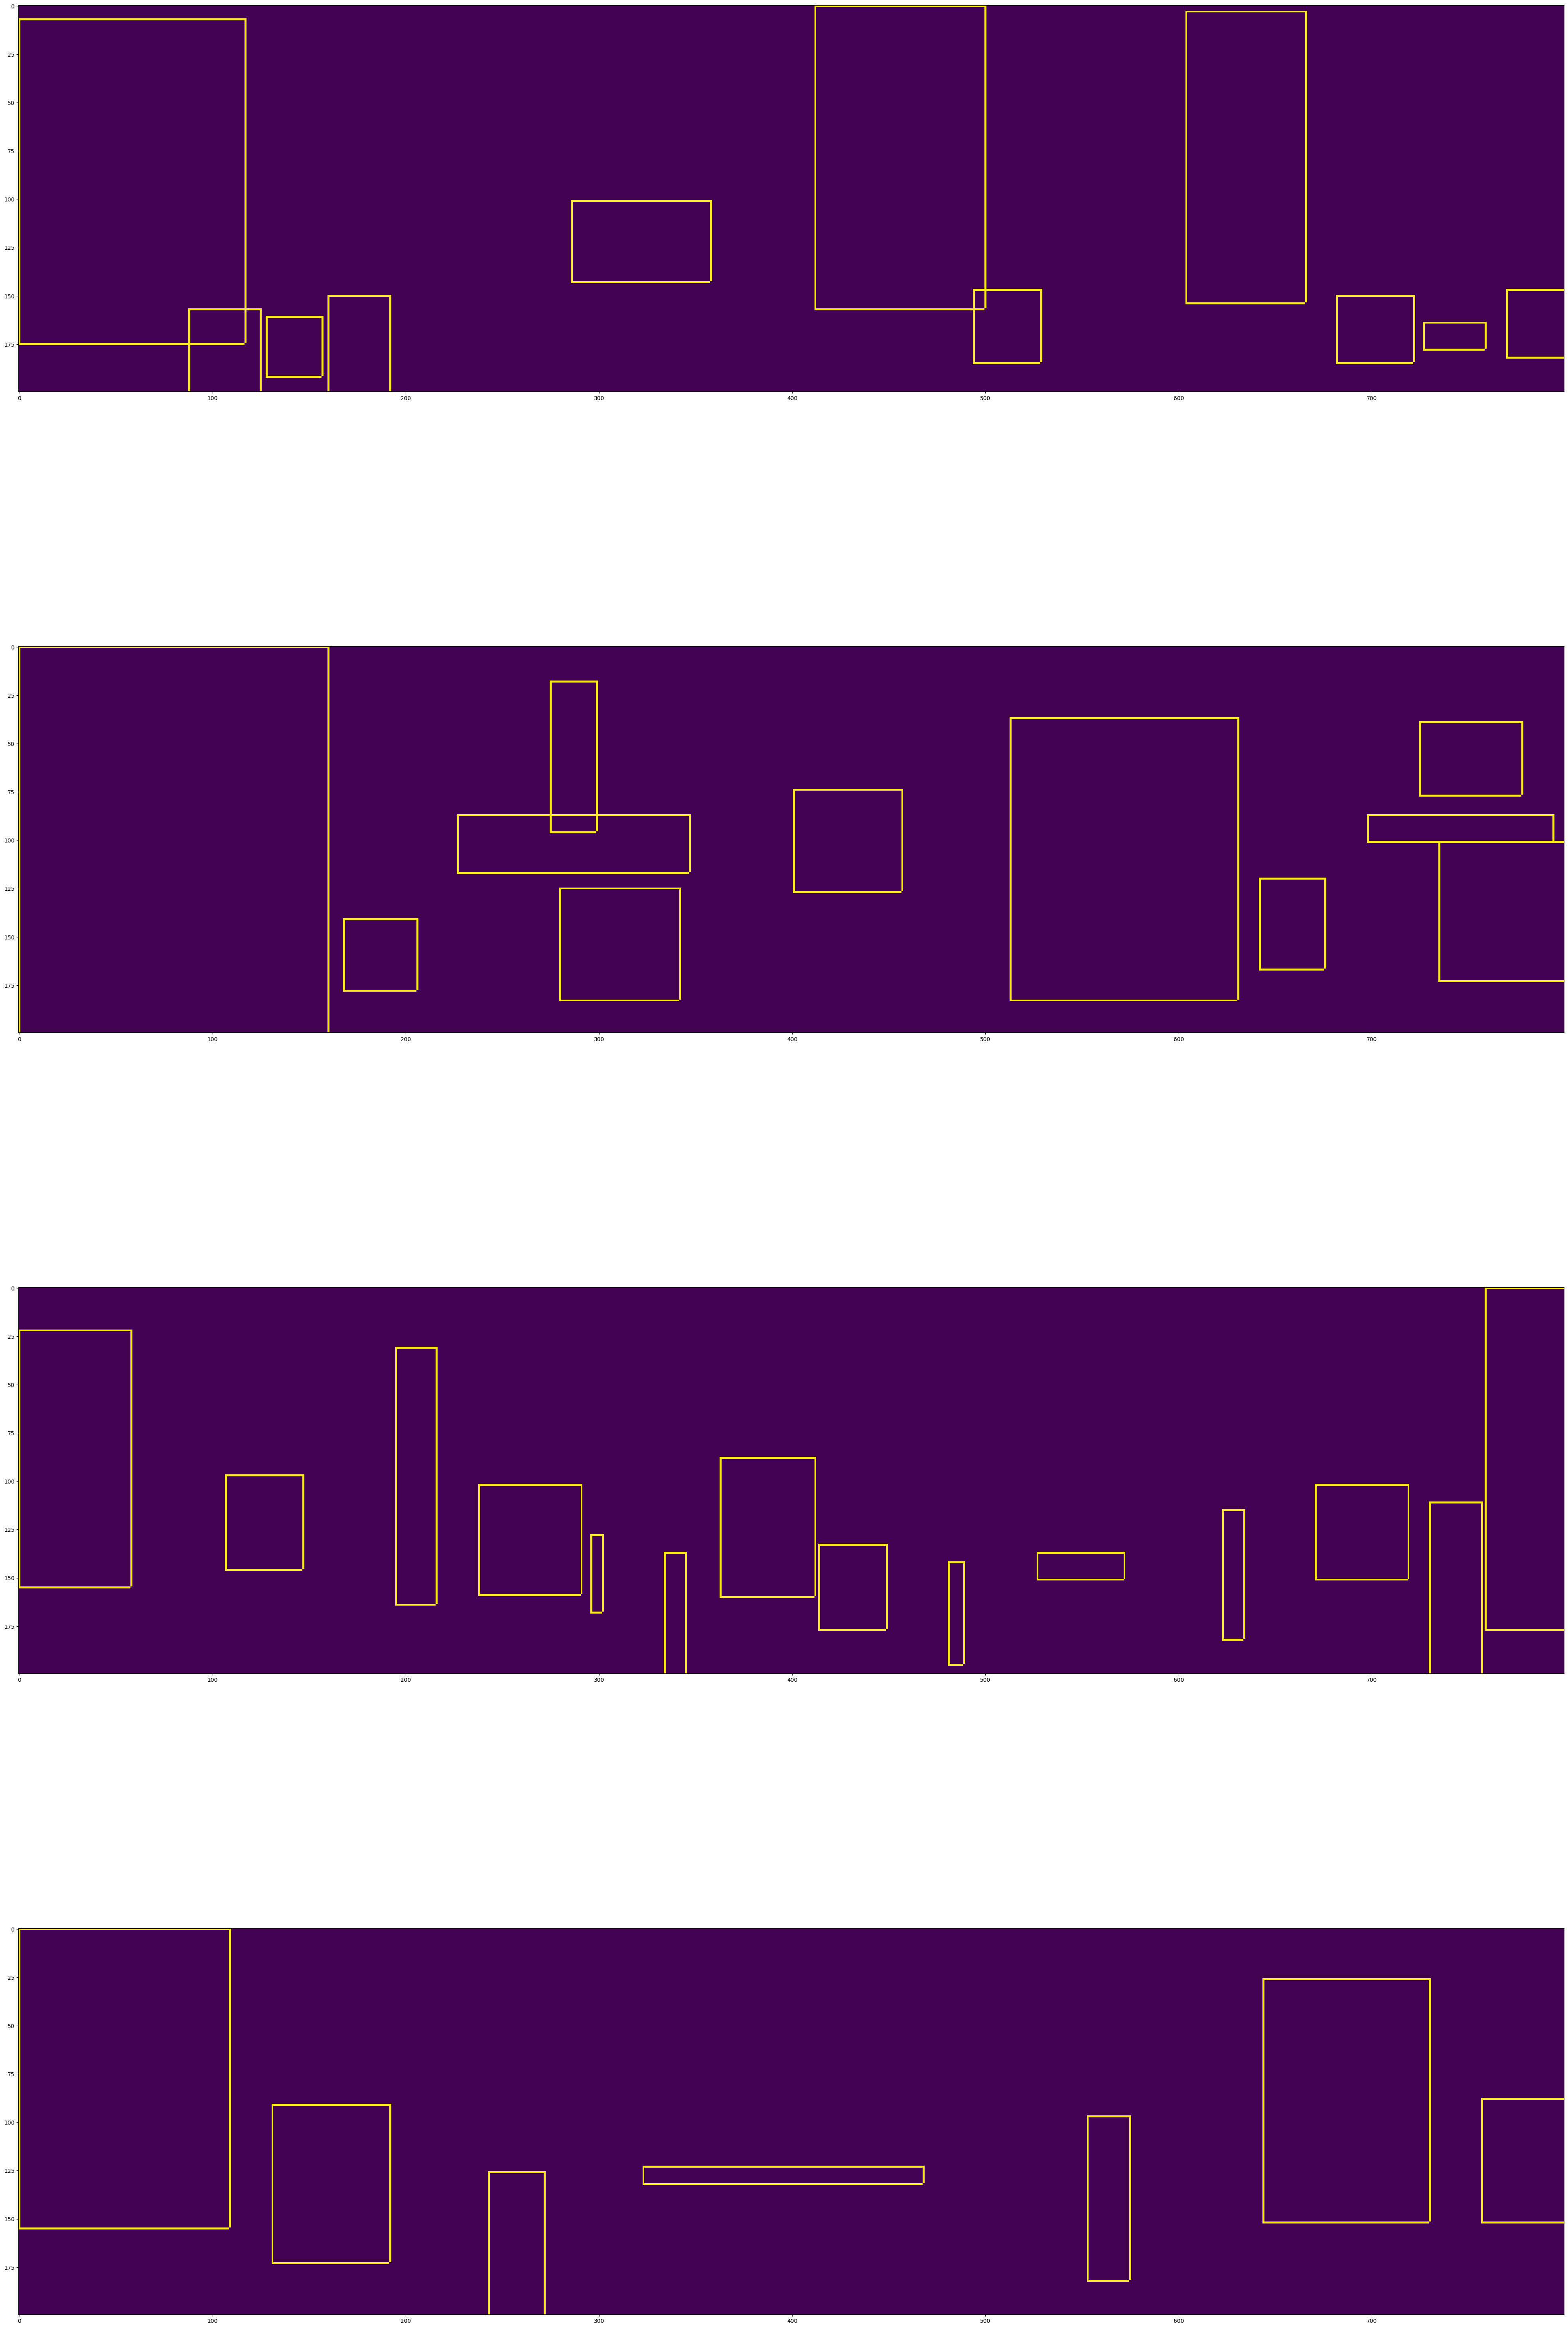

In [11]:
fig, ax = plt.subplots(batch_size, figsize=(50, 80))

for i in range(batch_size):
    coords = coordinates[i]
    coords = np.array(normalize_coordinates(np.array([coords]), contains_class=False)).squeeze()
    coords[:, [0,2]] *= img_width
    coords[:, [1,3]] *= img_height
    coords = torch.tensor(coords)
    ax[i].imshow(create_img_array_from_coordinates(coords).numpy())